# Prueba 1
Integrantes:
-Vicente Caceres
-Benjamin Hormazabal
-Enzo Oyarce
-Sebastian Puelma

#Visualizacion inicial de la data
Tambien incluiremos el trabajo de la data en esta seccion.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("BankData.csv")
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28


In [ ]:
#Hicimos una columna con variable binaria para definir si el cliente esta o no en el banco.
df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Sigue_en_el_banco'] = 1
df.loc[df['Attrition_Flag'] != 'Existing Customer', 'Sigue_en_el_banco'] = 0
df.head(5) 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,intervalos_presupuesto,Sigue_en_el_banco
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42,"(38.8, 43.1]",1.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33,"(43.1, 47.4]",1.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20,"(34.5, 38.8]",1.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20,"(30.2, 34.5]",1.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28,"(17.3, 21.6]",1.0


In [ ]:
df.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,8631.953698,1162.814061,4404.086304,64.858695
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,9088.776650,814.987335,3397.129254,23.472570
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,1438.300000,0.000000,510.000000,10.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2555.000000,359.000000,2155.500000,45.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,4549.000000,1276.000000,3899.000000,67.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,11067.500000,1784.000000,4741.000000,81.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,34516.000000,2517.000000,18484.000000,139.000000


In [ ]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Sigue_en_el_banco           float64
dtype: object

# Parte A









1.  Attrition_Flag: Cualitativa Nominal, debido a que clasifica en una variable binaria no ordinal a los clientes    

2.  Customer_Age: Cuantitativa Discreta, debido a que cuantifica las edades de los clientes, y ademas, esta cuantificacion no puede tener valores intermedios, son enteros.

3.  Gender: Cualitativa Nominal, debido a que ordena los datos en 2 clasificaciones, es decir, en una variable binaria no ordinal.

4.  Dependent_count: Cuantitativa Discreta, ya que nos muestra cuantas personas dependen del usuario del banco, lo que es un valor obligatoriamente entero.

5.  Education_Level: Cualitativa Ordinal, ya que ordena a sus clientes respecto a su nivel de educacion.

6.  Marital_Status: Cualitativa Nominal, debido a que clasifica sin orden a sus clientes dependiendo de su estado civil.

7.  Income_Category: Cualitativa ordinal, ya que ordena por categorias de ingresos economicos a sus clientes.

8.  Card_Category: Cualitativa Nominal, el tipo de tarjeta no tiene aparente relacion con el ingreso economico,

9.  Months_on_book: Cuantitavida Discreta, muestra la cantidad de meses que el cliente lleva en el banco.

10. Total_Relationship_Count: Cuantitativa Discreta, muestra la cantidad de productos que tiene el cliente en el banco.    

11. Months_Inactive_12_mon: Cuantitativa Discreta, muestra la cantidad de meses ,en magnitud de 12 meses por conteo, que el cliente lleva inactivo en el banco.

12. Credit_Limit: Cuantitativa Continua, nos muestra el valor limite que puede tomar el credito de un cliente del banco, valor que no necesariamente sera entero.      

13. Total_Revolving_Bal: Cuantitativa Discreta, nos muestra la cantidad del cupo utilizado que aun no ha pagado el cliente. Su comportamiento en la grafica se puede apreciar de forma continua.


14. Total_Trans_Amt: Cuantitativa Discreta, nos muestra el monto de todas las transacciones del cliente en los ultimos 12 meses. Esta variable puede verse de forma continua graficamente.

15. Total_Trans_Ct: Cuantitativa Discreta, nos muestra la cantidad de transacciones totales realizo el cliente. Sin embargo, su comportamiento en la grafica se puede apreciar de forma continua.

16. Sigue_en_el_banco: variable binaria creada para clasificar a los clientes segun su estadia en el banco, es una variable cualitativa nominal.

primero debes describir cada una de las variables de los datos adquiridos, excepto el identificador del cliente. Debes partir por señalar el tipo de variable, entre categórica nominal, categórica ordinal o numérica. Luego, debes analizar la distribución de cada una de estas variables para finalmente señalar cualquier aspecto relevante basado en la distribución observada. En caso que no detecte algún aspecto relevante, justifíquelo. 

#Parte B
-	¿Cómo distribuye la edad de clientes que abandonan vs los que no abandonan? 
-	¿La relación entre el cupo total y el cupo por pagar es distinta en clientes que abandonan vs clientes que no abandonan?
-	¿Cómo distribuyen los montos de las transacciones para clientas que abandonan vs clientes que no abandonan?


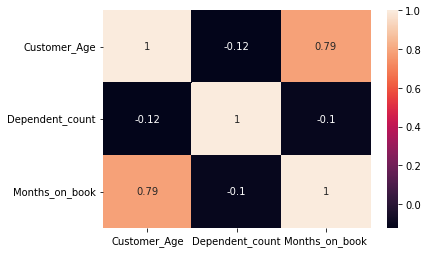

In [ ]:
# taking all rows but only 6 columns
correlation_mat = df[['Customer_Age','Dependent_count','Months_on_book']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()
# Relacion entre Edad de los clientes y los meses que llevan en el banco, indica que sus clientes en su mayoria tienen fidelidad y antiguedad con el banco, siendo captados en temprana edad

In [ ]:
eliminar0 = df['Sigue_en_el_banco'] == 1
eliminar1 = df['Sigue_en_el_banco'] == 0
df_fuera_banco = df[eliminar1]
df_sigue_banco = df[eliminar0]


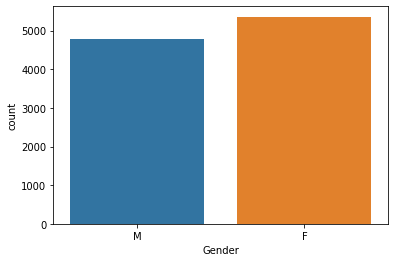

In [ ]:
#analizar la distribución de cada una de estas variables
ax = sns.countplot(x="Gender", data=df)

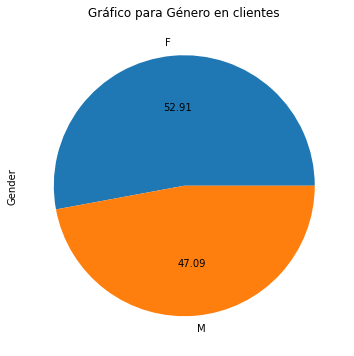

In [ ]:

# Gráfico de tarta de genero en clientes
plot = df['Gender'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Gráfico para Género en clientes')

In [ ]:
pd.value_counts(df['Card_Category'])

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

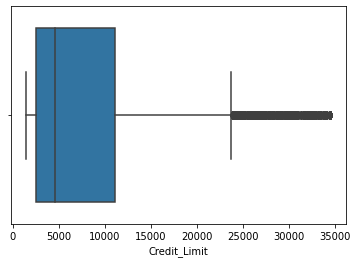

In [ ]:
#Credit_Limit
ax = sns.boxplot(x=df["Credit_Limit"])


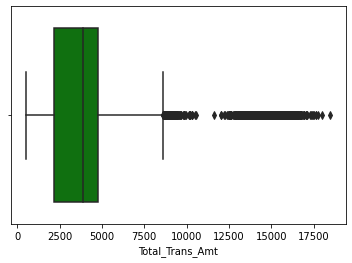

In [ ]:
#Total_Trans_Amt
ax = sns.boxplot(x=df["Total_Trans_Amt"],color="green")


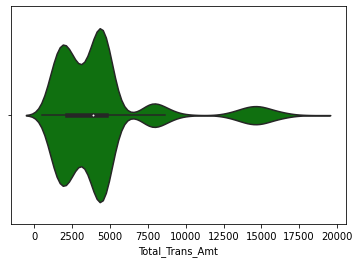

In [ ]:
sns.violinplot(x=df["Total_Trans_Amt"], color="green")

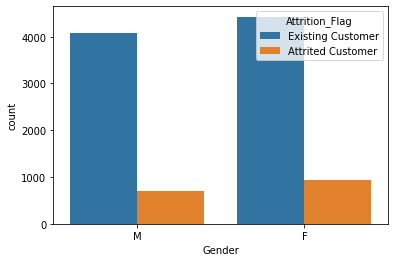

In [ ]:
ax = sns.countplot(x="Gender", hue="Attrition_Flag", data=df)


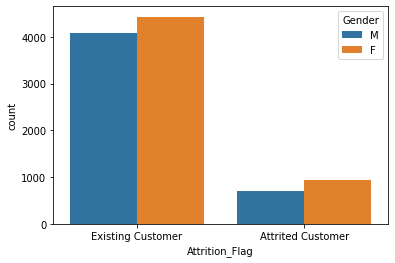

In [ ]:
ax = sns.countplot(x="Attrition_Flag", hue="Gender", data=df)


Text(0.5, 0, 'Edad del cliente')

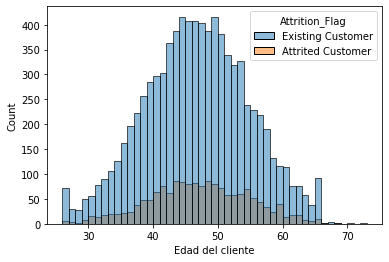

In [ ]:
df2 = df[(df["Attrition_Flag"] == "Existing Customer") | (df["Attrition_Flag"] == "Attrited Customer")]
sns.histplot(data= df, x="Customer_Age", hue="Attrition_Flag", stat="count").set_xlabel("Edad del cliente")


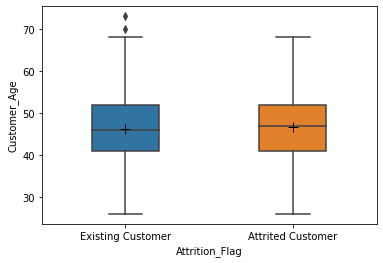

In [ ]:
ax = sns.boxplot(x=df["Attrition_Flag"], y=df["Customer_Age"], width=0.4, showmeans=True,meanprops={"marker": "+", 
                       "markeredgecolor": "black", 
                       "markersize": "10"})

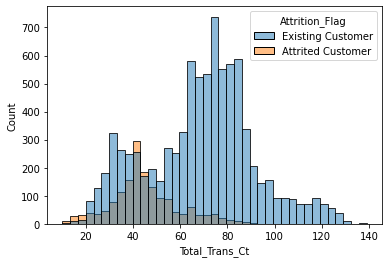

In [ ]:
df5 = df[(df["Attrition_Flag"] == "Existing Customer") | (df["Attrition_Flag"] == "Attrition Customer")]
sns.histplot(data= df, x="Total_Trans_Ct", hue="Attrition_Flag", stat="count")
#set_xlabel("")

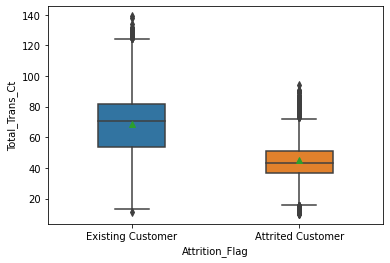

In [ ]:
ax = sns.boxplot(x=df["Attrition_Flag"], y=df["Total_Trans_Ct"], width=0.4, showmeans=True)

In [ ]:
df['Total_Trans_Ct'].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

Text(0.5, 0, 'Monto de todas las transacciones del cliente en los últimos 12 meses')

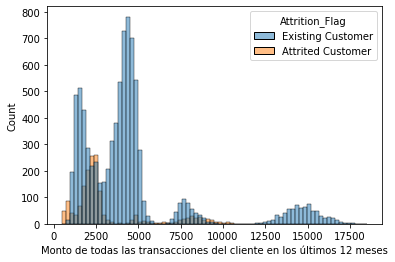

In [ ]:
df4 = df[(df["Attrition_Flag"] == "Existing Customer") | (df["Attrition_Flag"] == "Attrited Customer")]
sns.histplot(data= df, x="Total_Trans_Amt", hue="Attrition_Flag", stat="count").set_xlabel("Monto de todas las transacciones del cliente en los últimos 12 meses")

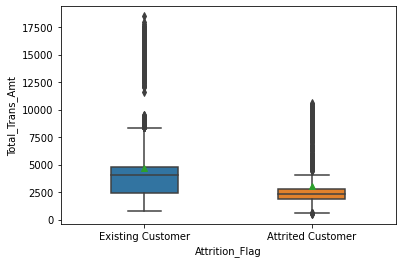

In [ ]:
ax = sns.boxplot(x=df["Attrition_Flag"], y=df["Total_Trans_Amt"], width=0.4, showmeans=True)

In [ ]:
df['Total_Trans_Amt'].describe()


count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

In [ ]:
df['Gender'].describe()


count     10127
unique        2
top           F
freq       5358
Name: Gender, dtype: object

In [ ]:
df_dummies = pd.get_dummies(df['Attrition_Flag'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['Attrition_Flag']
df_new.head(2)


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Attrited Customer
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42,0
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33,0


In [ ]:
x = df_new[['Total_Revolving_Bal', 'Credit_Limit', 'Attrited Customer', 'Total_Trans_Amt']]

In [ ]:
#Intento de hacer una matriz de correlaciones pero no fue útil
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[ 1.          0.04249261 -0.26305288  0.06437048]
 [ 0.04249261  1.         -0.02387299  0.17173015]
 [-0.26305288 -0.02387299  1.         -0.16859838]
 [ 0.06437048  0.17173015 -0.16859838  1.        ]]


In [ ]:

# tabla de frecuencia 
pd.value_counts(df['Attrition_Flag'])

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

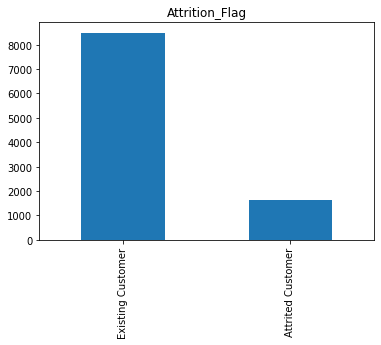

In [ ]:

# Gráfico de barras de Attrition_Flag
plot = df['Attrition_Flag'].value_counts().plot(kind='bar',
                                            title='Attrition_Flag')

In [ ]:
# Tabla de contingencia class / survived
pd.crosstab(index=df['Education_Level'],
            columns=df['Attrition_Flag'], margins=True)

Attrition_Flag,Attrited Customer,Existing Customer,All
Education_Level,,,
College,154,859,1013
Doctorate,95,356,451
Graduate,487,2641,3128
High School,306,1707,2013
Post-Graduate,92,424,516
Uneducated,237,1250,1487
Unknown,256,1263,1519
All,1627,8500,10127


In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Education_Level'], columns=df['Attrition_Flag'],
            ).apply(lambda r: r/r.sum() *100,
                                axis=0)
        

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,9.465274,10.105882
Doctorate,5.838967,4.188235
Graduate,29.932391,31.070588
High School,18.807621,20.082353
Post-Graduate,5.654579,4.988235
Uneducated,14.566687,14.705882
Unknown,15.734481,14.858824


In [ ]:
pd.crosstab(index=df['Card_Category'],
            columns=df['Attrition_Flag'], margins=True)

Attrition_Flag,Attrited Customer,Existing Customer,All
Card_Category,,,
Blue,1519,7917,9436
Gold,21,95,116
Platinum,5,15,20
Silver,82,473,555
All,1627,8500,10127


In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Card_Category'], columns=df['Attrition_Flag'],
            ).apply(lambda r: r/r.sum() *100,
                                axis=0)
        

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,93.362016,93.141176
Gold,1.290719,1.117647
Platinum,0.307314,0.176471
Silver,5.039951,5.564706


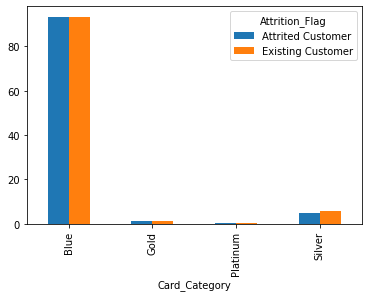

In [ ]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=df['Card_Category'],
            columns=df['Attrition_Flag']).apply(lambda r: r/r.sum() *100,
                                              axis=0).plot(kind='bar')

In [ ]:
pd.crosstab(index=df['Income_Category'],
            columns=df['Attrition_Flag'], margins=True)

Attrition_Flag,Attrited Customer,Existing Customer,All
Income_Category,,,
$120K +,126,601,727
$40K - $60K,271,1519,1790
$60K - $80K,189,1213,1402
$80K - $120K,242,1293,1535
Less than $40K,612,2949,3561
Unknown,187,925,1112
All,1627,8500,10127


In [ ]:
pd.crosstab(index=df['Income_Category'],
            columns=df['Card_Category'], margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Income_Category,,,,,
$120K +,645,18,4,60,727
$40K - $60K,1675,15,1,99,1790
$60K - $80K,1273,29,4,96,1402
$80K - $120K,1395,21,2,117,1535
Less than $40K,3403,24,4,130,3561
Unknown,1045,9,5,53,1112
All,9436,116,20,555,10127


In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Income_Category'], columns=df['Attrition_Flag'],
            ).apply(lambda r: r/r.sum() *100,
                                axis=0)
        

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,7.744315,7.070588
$40K - $60K,16.656423,17.870588
$60K - $80K,11.616472,14.270588
$80K - $120K,14.874001,15.211765
Less than $40K,37.615243,34.694118
Unknown,11.493546,10.882353


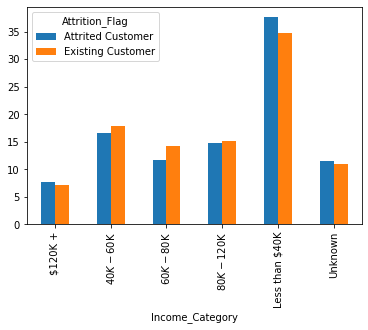

In [ ]:

# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=df['Income_Category'],
            columns=df['Attrition_Flag']).apply(lambda r: r/r.sum() *100,
                                              axis=0).plot(kind='bar')